In [55]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [56]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [57]:
df=pd.read_csv('german_credit.csv')
df.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [58]:
df.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [59]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### Lets check if there is any missing value in the dataset

In [60]:
df.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [61]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [62]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [63]:
df_modeldata = pd.get_dummies(df, columns=['account_check_status','credit_history', 'purpose','savings','present_emp_since','personal_status_sex','other_debtors','property','other_installment_plans','housing','job','foreign_worker'])

In [64]:
df_modeldata.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,telephone,account_check_status_0 <= ... < 200 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,"yes, registered under the customers name",0,...,0,0,1,0,0,1,0,0,0,1
1,1,48,5951,2,2,22,1,1,none,1,...,0,0,1,0,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,none,0,...,0,0,1,0,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,none,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,none,0,...,0,1,0,0,0,1,0,0,0,1


In [65]:
# Print Shape of model data
df_modeldata.shape

(1000, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [66]:
df_modeldata.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,0.050523,0.081556,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,0.065688,0.189117,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,0.024262,0.201643,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.056071,0.040098,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.054460,0.227044,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,-0.011080,0.253058,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.023496,0.011406,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,0.009335,0.118047,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,-0.017507,-0.000378,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,0.011886,0.067961,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.057751,-0.057751


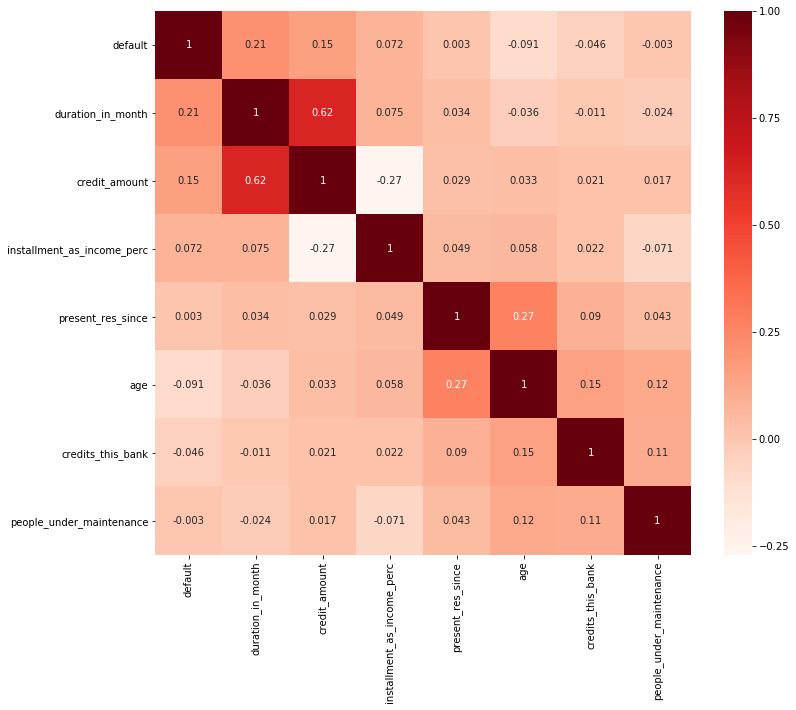

In [67]:
#Lets check the correlation of the whole dataframe in graph
plt.figure(figsize=(12,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

### Drop the original variables which are converted to dummy

In [68]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask]
df_dummy=pd.get_dummies(df[categorical_cols])
df_dummy.head()

,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [69]:
df_concatenation=pd.concat([df,df_dummy],axis=1)
df_concatenation=df_concatenation.drop(columns=categorical_cols)
df_concatenation.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


In [70]:
print(df_concatenation.shape)

(1000, 62)


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [71]:
# We are dropping the target column i.e.default into separate vectors for training set and test set
x=df_concatenation.drop(columns=['default'])
y=df_concatenation['default']

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=20)

In [73]:
print("The training set is ",x.shape)
print("The testing set is ",y.shape)

The training set is  (1000, 61)
The testing set is  (1000,)


In [74]:
print('x.train:',x_train.shape)
print("y.train:",y_train.shape)

x.train: (700, 61)
y.train: (700,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
clf_g=clf.fit(x_train, y_train)
print(clf_g.predict)

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)>


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_predict = clf_g.predict(x_test)
print(clf_g.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7066666666666667
[[177  15]
 [ 73  35]]


In [77]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_predict)

0.7066666666666667

### Q6 Show the list of the features importance( 1 Marks)

In [78]:
print("Below listed feature importance in decending order")
(pd.DataFrame([clf_g.feature_importances_],columns=x_train.columns).T).sort_values(by=0,ascending=False)

Below listed feature importance in decending order


,0
credit_amount,0.104604
age,0.081355
duration_in_month,0.076708
account_check_status_no checking account,0.042825
installment_as_income_perc,0.035186
present_res_since,0.033163
account_check_status_< 0 DM,0.022145
savings_... < 100 DM,0.021647
purpose_car (new),0.020015
credits_this_bank,0.019175


In [79]:
print(clf_g.feature_importances_)

[0.07670802 0.10460395 0.03518559 0.03316276 0.08135464 0.01917465
 0.01140589 0.01555708 0.02214524 0.0075115  0.04282549 0.00894703
 0.01740387 0.00989927 0.01410425 0.01022657 0.01087114 0.00917492
 0.02001472 0.01192484 0.01473728 0.00397839 0.0010163  0.01245779
 0.00084018 0.00092194 0.00678452 0.02164687 0.01083183 0.00607897
 0.01767336 0.01338984 0.01771028 0.01573183 0.01247881 0.00878204
 0.01564439 0.00652535 0.00810523 0.01448615 0.00584468 0.00602505
 0.00805456 0.01507632 0.01498362 0.01697423 0.01178502 0.01199953
 0.01684167 0.00794009 0.00704874 0.01644597 0.01229862 0.01108489
 0.01499811 0.00326019 0.0122612  0.0147299  0.01410796 0.00312638
 0.00309052]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [81]:
# Use below values
num_folds = 10
seed = 77

In [82]:
#Validate the Random Forest model build above using k fold

In [83]:
ger_score=[]

ger_kflod=KFold(n_splits=num_folds,random_state=seed)

for train,_ in ger_kflod.split(x_train,y_train):
    clf_g = clf.fit(x_train.iloc[train,:], y_train.iloc[train])
    ger_score.append(clf_g.score(x_test , y_test))

In [84]:
col=[]
for i in range(1,11):
    j='Fold '+ str(i)
    col.append(j)
Model_score_KFold=pd.DataFrame(ger_score).T
Model_score_KFold.columns=col
print('Model Score for 10 Folds :')
Model_score_KFold

Model Score for 10 Folds :


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10
0,0.706667,0.696667,0.7,0.7,0.706667,0.69,0.72,0.69,0.706667,0.696667


In [85]:
#Calculate Mean score
avg_score = np.mean(ger_score)
print("The average score is : ",avg_score)

The average score is :  0.7013333333333333


In [86]:
# Calculate score standard deviation using std()

In [87]:
np.std(ger_score)

0.008589399151150095

# Q8 Print the confusion matrix( 1 Marks)

In [88]:
ger_score=[]

ger_kflod=KFold(n_splits=10,random_state=77)
i=1
for train,_ in ger_kflod.split(x_train,y_train):
    clf_g = clf.fit(x_train.iloc[train,:], y_train.iloc[train])
    y_predict = clf_g.predict(x_test)
    i=0+i
    print('Confusion matrics for Fold'+str(i),':\n',metrics.confusion_matrix(y_test, y_predict))
    i=i+1

Confusion matrics for Fold1 :
 [[179  13]
 [ 75  33]]
Confusion matrics for Fold2 :
 [[178  14]
 [ 77  31]]
Confusion matrics for Fold3 :
 [[179  13]
 [ 77  31]]
Confusion matrics for Fold4 :
 [[177  15]
 [ 75  33]]
Confusion matrics for Fold5 :
 [[178  14]
 [ 74  34]]
Confusion matrics for Fold6 :
 [[178  14]
 [ 79  29]]
Confusion matrics for Fold7 :
 [[179  13]
 [ 71  37]]
Confusion matrics for Fold8 :
 [[174  18]
 [ 75  33]]
Confusion matrics for Fold9 :
 [[176  16]
 [ 72  36]]
Confusion matrics for Fold10 :
 [[179  13]
 [ 78  30]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [89]:
y_predict=clf_g.predict(x_test)
from sklearn.metrics import classification_report

print('Classification accuracy and sensitivity as shown below:')
pre_dat_NB=pd.DataFrame(classification_report(y_test,y_predict,output_dict=True)).T
pre_dat_NB

Classification accuracy and sensitivity as shown below:


,f1-score,precision,recall,support
0,0.797327,0.696498,0.932292,192.0
1,0.397351,0.697674,0.277778,108.0
micro avg,0.696667,0.696667,0.696667,300.0
macro avg,0.597339,0.697086,0.605035,300.0
weighted avg,0.653336,0.696922,0.696667,300.0


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

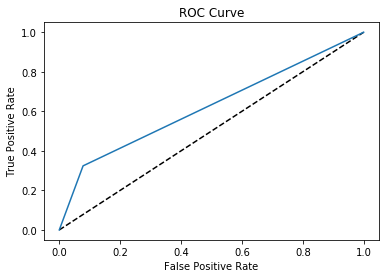

In [90]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve
clg_g = clf.fit(x_train, y_train)
y_predict=clf_g.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test,y_predict )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [91]:
from sklearn.metrics import roc_auc_score
y_predict=clf_g.predict(x_test)
auc = roc_auc_score(y_test,y_predict)
print('AUC(Percentage of ROS plot that is underneath the cuve is:)', "{:.2%}".format(auc))

AUC(Percentage of ROS plot that is underneath the cuve is:) 62.30%


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [92]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [93]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    clf.fit(X_, y_)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [94]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7023333333333334
Standard deviation:  0.016196707484341794
